In [1]:
import cv2
import numpy as np

def preprocess_cheque_image(cheque_image_path, desired_width=1500, clip_limit=0.3, tile_grid_size=(2, 2), gaussian_kernel=(3, 3), gaussian_std=0, adaptive_threshold=False, erosion_dilation=False):
    # Load the cheque image without resizing
    image = cv2.imread(cheque_image_path, cv2.IMREAD_UNCHANGED)

    if image is None:
        print("Error: Could not load the image.")
        return None

    # Calculate the aspect ratio
    aspect_ratio = image.shape[1] / image.shape[0]

    # Calculate the corresponding height to maintain the aspect ratio
    desired_height = int(desired_width / aspect_ratio)

    # Resize the image to the desired dimensions
    resized_image = cv2.resize(image, (desired_width, desired_height))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Remove shadows using CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    shadow_removal_image = clahe.apply(gray_image)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(shadow_removal_image, gaussian_kernel, gaussian_std)

    # Apply morphological operations (erosion and dilation) if enabled
    if erosion_dilation:
        kernel = np.ones((1, 1), np.uint8)
        morph_image = cv2.morphologyEx(blurred_image, cv2.MORPH_CLOSE, kernel)
        return morph_image

    return blurred_image

# Path to your cheque image
cheque_image_path = "C:\\Users\\yashp\\OneDrive\\Desktop\\300\\f1.tif"

# Preprocess the cheque image with morphological operations (erosion and dilation)
preprocessed_image = preprocess_cheque_image(cheque_image_path, desired_width=1500, clip_limit=0.3, tile_grid_size=(2, 2), gaussian_kernel=(3, 3), gaussian_std=0, adaptive_threshold=False, erosion_dilation=True)

if preprocessed_image is not None:
    # Display the preprocessed image with morphological operations
    cv2.imshow("Preprocessed Image with Morphological Operations", preprocessed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [4]:
import pytesseract
from PIL import Image

# Load the cheque image using Pillow (PIL)
cheque_image = Image.open("C:\\Users\\yashp\\OneDrive\\Desktop\\300\\f20.tif")

# Perform OCR to extract text
text = pytesseract.image_to_string(cheque_image)

# Split the extracted text by space to find individual words
words = text.split()

ifs_code = None

# Search for a word that matches the pattern of IFS code (typically 11 characters)
for word in words:
    if len(word) == 11 and word.isalnum():
        ifs_code = word
        break
# Print the extracted IFS code and account number
if ifs_code:
    print("IFS Code:", ifs_code)
else:
    print("IFS Code not found in the image")



IFS Code: ICIC0006308


In [30]:
import cv2
import pytesseract

# Load the cheque image
cheque_image = cv2.imread("C:\\Users\\yashp\\OneDrive\\Desktop\\300\\f25.tif")

# Define the coordinates for the ROI (top-left and bottom-right points)
x1, y1 = 400, 500  # Coordinates of the top-left corner of the ROI
x2, y2 = 1200, 600  # Coordinates of the bottom-right corner of the ROI

# Crop the image to the specified ROI
roi = cheque_image[y1:y2, x1:x2]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Apply thresholding to make the text more prominent
_, thresh = cv2.threshold(gray_roi, 150, 255, cv2.THRESH_BINARY)

# Display the segmented image
cv2.imshow("Segmented Image", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Use Tesseract OCR to extract text from the thresholded image
account_number = pytesseract.image_to_string(thresh)

# Filter out non-numeric characters
filtered_account_number = ''.join(filter(str.isdigit, account_number))

# Print the extracted A/C NO.
print(filtered_account_number.strip())  # Use strip() to remove leading/trailing whitespace

# You can save this account number or use it as needed


11010049001545


In [21]:
import cv2

# Load the cheque image
cheque_image = cv2.imread("C:\\Users\\yashp\\OneDrive\\Desktop\\300\\f20.tif")

# Define the coordinates for the ROI (top-left and bottom-right points)
x1, y1 = 1900, 750  # Coordinates of the top-left corner of the ROI
x2, y2 = 2300, 900  # Coordinates of the bottom-right corner of the ROI

# Crop the image to the specified ROI
roi = cheque_image[y1:y2, x1:x2]

# Display or save the cropped ROI
cv2.imshow("ROI", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()


# If you want to save the ROI as a new image:
cv2.imwrite("cropped_roi.png", roi)

import cv2
import pytesseract

# Load the cropped ROI
roi = cv2.imread("cropped_roi.png")

# Convert the ROI to grayscale

gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Use Tesseract OCR to extract text from the ROI
account_number = pytesseract.image_to_string(gray_roi)

# Print the extracted A/C NO.
print(account_number.strip())  # Use strip() to remove leading/trailing whitespace

# You can save this account number or use it as needed





—

Plaaca ciqn ahove


In [15]:
import cv2

# Load the cheque image
cheque_image = cv2.imread("C:\\Users\\yashp\\Downloads\\300\\Cheque 309151.tif")

# Define the coordinates for the ROI (top-left and bottom-right points)
x1, y1 = 1900, 650  # Coordinates of the top-left corner of the ROI
x2, y2 = 2300, 900  # Coordinates of the bottom-right corner of the ROI

# Crop the image to the specified ROI
roi = cheque_image[y1:y2, x1:x2]

# Display or save the cropped ROI
cv2.imshow("ROI", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

# If you want to save the ROI as a new image:
cv2.imwrite("cropped_roi.png", roi)


True

In [10]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

# Function to extract and preprocess the signature from a cheque image
def extract_and_process_signature(image_path, target_length=1000):
    # Load the cheque image
    cheque_image = cv2.imread(image_path)

    # Define the coordinates for the ROI (top-left and bottom-right points)
    x1, y1 = 1900, 650  # Coordinates of the top-left corner of the ROI
    x2, y2 = 2300, 900  # Coordinates of the bottom-right corner of the ROI

    # Crop the image to the specified ROI
    signature_segment = cheque_image[y1:y2, x1:x2]

    # Your existing code for signature preprocessing goes here
    # ...

    # After segmentation, apply the SIFT algorithm for feature extraction
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(signature_segment, None)

    # Flatten the feature descriptors into a 1D array
    signature_features = des.flatten()

    # Pad or truncate the array to the target length
    signature_features = signature_features[:target_length]

    # Return the processed features
    return signature_features

# Folder containing cheque images
cheque_folder = "C:\\Users\\yashp\\OneDrive\\Desktop\\300"

# Lists to store features and labels
features = []
labels = []

# Iterate through cheque images in the folder
for filename in os.listdir(cheque_folder):
    if filename.endswith(".tif") or filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(cheque_folder, filename)

        # Extract and preprocess the signature
        signature_features = extract_and_process_signature(image_path)

        # Append features and label (genuine or forged) to the lists
        features.append(signature_features)
        labels.append("g" if "g" in filename else "f")

# Print unique labels to check the classes
print("Unique Labels:", set(labels))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
classifier = svm.SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Unique Labels: {'g', 'f'}
Accuracy: 63.64%


C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


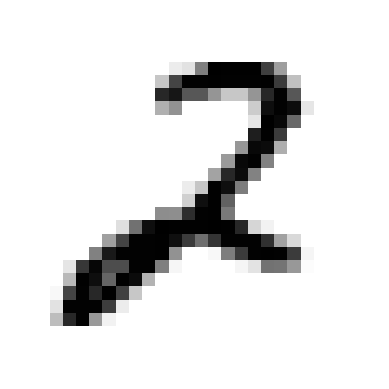

KeyError: "None of [Int64Index([33099,  2056, 54651,  5216,  3857, 20989, 35658, 46708, 16330,\n            24246,\n            ...\n            37384,  9307, 14430,  5617, 50757,  2960, 27017, 29669,  8217,\n            24750],\n           dtype='int64', length=60000)] are in the [columns]"

In [142]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]  # Fixed the shuffle syntax

# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)  # Changed '2' to 2
y_test_2 = (y_test == 2)  # Changed '2' to 2

# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)

# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())
